<a href="https://colab.research.google.com/github/kaeba0616/BED/blob/main/%5BLab_session_5%5D_Data_Preprocessing_Part1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


# Filtering Data
Filter only DataFrame with numeric attribute.

In [79]:
df['DriveTrain'].unique()

array(['Front', nan, 'Rear', '4WD'], dtype=object)

In [80]:
numericDf = df.filter(df.select_dtypes(include='number'))
numericDf

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.8,25.0,31.0,1.8,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0
1,29.2,33.9,38.7,18.0,25.0,3.2,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0
2,25.9,29.1,32.3,20.0,26.0,2.8,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0
3,NaN,37.7,44.6,19.0,26.0,NaN,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0
4,NaN,30.0,NaN,22.0,30.0,3.5,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17.0,21.0,2.5,109.0,4500.0,2915.0,21.1,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0
89,17.6,20.0,22.4,21.0,30.0,2.0,134.0,5800.0,2685.0,18.5,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0
90,22.9,23.3,23.7,18.0,25.0,2.8,178.0,5800.0,2385.0,18.5,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0
91,21.8,22.7,23.5,21.0,28.0,2.3,114.0,5400.0,2215.0,15.8,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0


# Handling Outlier

**[TODO]** Exclude the outlier (cars) with too much expensive.
* Assume that `price` of outlier is greater than `Q3 + (1.5 * IQR)`.

In [81]:
attribute = 'Price'

Q1 = numericDf[attribute].quantile(.25)
Q3 = numericDf[attribute].quantile(.75)
IQR = Q3 - Q1
outlierStep = 1.5 * IQR

filtered_df = numericDf[(numericDf[attribute] > Q1 - outlierStep) | (numericDf[attribute] < Q3 + outlierStep) ]

Draw histogram of `price`.

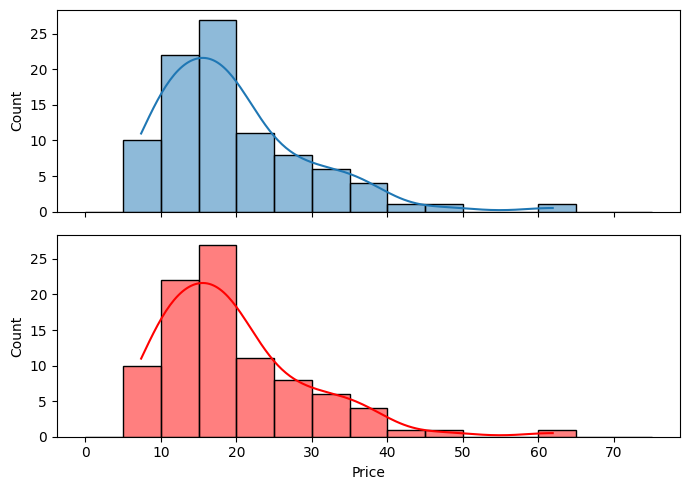

In [82]:
f, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

sns.histplot(data=df, x='Price', ax=axes[0], kde=True,
             bins=np.arange(0,80,5))
sns.histplot(data=filtered_df, x='Price', color='Red',
             ax=axes[1], kde=True, bins=np.arange(0,80,5))
f.tight_layout()

# Hanlding Missing Value
---
Last time, we dropped the NaN value, impute this time.

print the `head()` of numeric_df

In [83]:
numericDf.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.8,25.0,31.0,1.8,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0
1,29.2,33.9,38.7,18.0,25.0,3.2,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0
2,25.9,29.1,32.3,20.0,26.0,2.8,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0
3,NaN,37.7,44.6,19.0,26.0,NaN,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0
4,NaN,30.0,NaN,22.0,30.0,3.5,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0


There are many NaN values exist.

Use `info()` to check the details.

In [84]:
numericDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Min.Price           86 non-null     float64
 1   Price               91 non-null     float64
 2   Max.Price           88 non-null     float64
 3   MPG.city            84 non-null     float64
 4   MPG.highway         91 non-null     float64
 5   EngineSize          91 non-null     float64
 6   Horsepower          86 non-null     float64
 7   RPM                 90 non-null     float64
 8   Rev.per.mile        87 non-null     float64
 9   Fuel.tank.capacity  85 non-null     float64
 10  Passengers          91 non-null     float64
 11  Length              89 non-null     float64
 12  Wheelbase           92 non-null     float64
 13  Width               87 non-null     float64
 14  Turn.circle         88 non-null     float64
 15  Rear.seat.room      89 non-null     float64
 16  Luggage.ro

**[TODO]** Impute the data with missing value with `SimpleImputer` with `median`.
---
[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [85]:
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(numericDf)

imputedNumericDf = pd.DataFrame(imp_median.transform(numericDf),columns=numericDf.columns)
imputedNumericDf.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.80,25.0,31.0,1.8,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.0,37.0,26.5,14.0,2705.0
1,29.2,33.9,38.70,18.0,25.0,3.2,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0
2,25.9,29.1,32.30,20.0,26.0,2.8,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0
3,14.6,37.7,44.60,19.0,26.0,2.3,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,69.0,37.0,31.0,17.0,3405.0
4,14.6,30.0,19.15,22.0,30.0,3.5,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0


Check through `info()` that NaN values don't exist any more.

In [86]:
imputedNumericDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Min.Price           93 non-null     float64
 1   Price               93 non-null     float64
 2   Max.Price           93 non-null     float64
 3   MPG.city            93 non-null     float64
 4   MPG.highway         93 non-null     float64
 5   EngineSize          93 non-null     float64
 6   Horsepower          93 non-null     float64
 7   RPM                 93 non-null     float64
 8   Rev.per.mile        93 non-null     float64
 9   Fuel.tank.capacity  93 non-null     float64
 10  Passengers          93 non-null     float64
 11  Length              93 non-null     float64
 12  Wheelbase           93 non-null     float64
 13  Width               93 non-null     float64
 14  Turn.circle         93 non-null     float64
 15  Rear.seat.room      93 non-null     float64
 16  Luggage.ro

**[TODO]** Impute the data with missing value with `Knn imputation
` with `n_neighbors = 2` and give weight by `distance`


In [87]:
from sklearn.impute import KNNImputer

imp_KNN = KNNImputer(n_neighbors=2, weights='distance')

imputeDF_KNN = pd.DataFrame(imp_KNN.fit_transform(numericDf), columns=numericDf.select_dtypes(include='number').columns)
imputeDF_KNN.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.900000,15.9,18.80000,25.0,31.0,1.800000,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.00000,37.0,26.5,13.053113,2705.0
1,29.200000,33.9,38.70000,18.0,25.0,3.200000,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.00000,38.0,30.0,15.000000,3560.0
2,25.900000,29.1,32.30000,20.0,26.0,2.800000,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.00000,37.0,28.0,14.000000,3375.0
3,28.332082,37.7,44.60000,19.0,26.0,3.097892,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,70.48946,37.0,31.0,17.000000,3405.0
4,17.737339,30.0,21.95971,22.0,30.0,3.500000,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.00000,39.0,27.0,13.000000,3640.0


# Balancing Data

Draw a catplot plotting the x-axis using `DrivenTrain` and set the type of plot to be drawn to `count`.
[catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

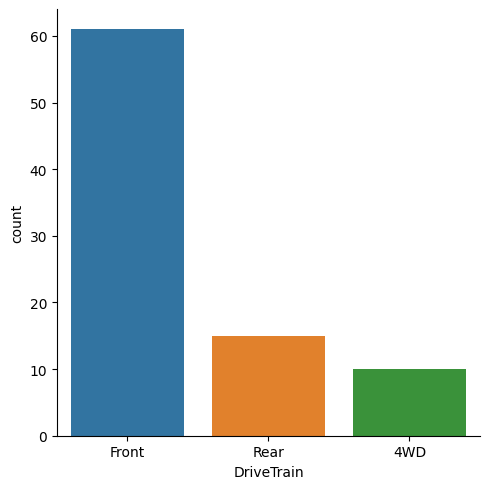

In [88]:
sns.catplot(data= df, x="DriveTrain", kind="count" )
f.tight_layout()

**[TODO]** Undersample the `Front` and `Rear` cars as much as `4WD` cars.

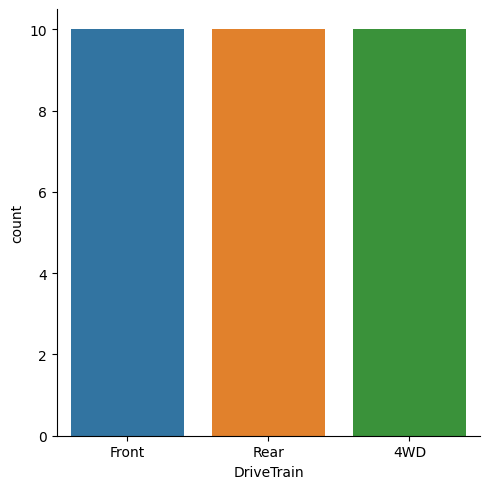

In [89]:
num_Front = len(df[df["DriveTrain"] == "Front"])
num_Rear = len(df[df["DriveTrain"] == "Rear"])
num_4WD = len(df[df["DriveTrain"] == "4WD"])

# random undersample
undersampledDf = pd.concat([df[df["DriveTrain"]=="Front"].sample(num_4WD),
                            df[df["DriveTrain"]=="Rear"].sample(num_4WD),
                            df[df["DriveTrain"]=="4WD"]])

sns.catplot(data=undersampledDf, kind="count", x='DriveTrain')
f.tight_layout()

## Oversampling

Add column `DriveTrain` from `df` to `imputedNumericDf` which was used for knn imputer above. And drop the sample with missing value on `DriveTrain` using `.dropna()` method of `pd`.

In [90]:
imputedNumericDf['DriveTrain'] = df['DriveTrain']
imputedNumericDf = imputedNumericDf.dropna()


**[TODO]** By using SMOTE, resample all classes but the majority class, `Front`. Pleaser check the parameter, `sampling_strategy`, in [[ref](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)].

In [109]:
from imblearn.over_sampling import SMOTE


# Apply SMOTE
X = imputedNumericDf.drop(columns= "DriveTrain")
y = imputedNumericDf['DriveTrain']

smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=imputedNumericDf.columns)
df_resampled['DriveTrain'] = y_resampled
df_resampled

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,DriveTrain
0,12.900000,15.900000,18.800000,25.000000,31.000000,1.800000,140.000000,6300.000000,2890.000000,13.200000,5.000000,177.000000,102.000000,68.000000,37.000000,26.500000,14.000000,2705.000000,Front
1,29.200000,33.900000,38.700000,18.000000,25.000000,3.200000,200.000000,5500.000000,2335.000000,18.000000,5.000000,195.000000,115.000000,71.000000,38.000000,30.000000,15.000000,3560.000000,Front
2,25.900000,29.100000,32.300000,20.000000,26.000000,2.800000,172.000000,5500.000000,2280.000000,16.900000,5.000000,180.000000,102.000000,67.000000,37.000000,28.000000,14.000000,3375.000000,Front
3,14.600000,30.000000,19.150000,22.000000,30.000000,3.500000,208.000000,5700.000000,2545.000000,21.100000,4.000000,186.000000,109.000000,69.000000,39.000000,27.000000,13.000000,3640.000000,Rear
4,19.900000,20.800000,19.150000,19.000000,28.000000,3.800000,170.000000,4800.000000,2360.000000,16.500000,6.000000,200.000000,111.000000,74.000000,42.000000,30.500000,17.000000,3470.000000,Front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,11.466427,15.694945,19.923464,21.231046,28.743682,2.581950,119.097498,4600.000000,2161.967289,15.681950,4.000000,183.332136,101.000000,69.537909,40.768954,24.256318,12.256318,3124.729313,Rear
179,35.865477,42.358833,19.150000,18.547812,24.476499,4.190438,256.330630,5907.131273,2137.641829,22.066613,4.690438,195.666126,111.761750,71.071313,41.071313,28.380875,14.380875,3888.557528,Rear
180,16.064703,18.267793,20.470884,17.967649,26.967649,3.693674,165.161757,4393.529738,1570.140077,19.371317,5.032351,205.291162,108.742635,76.032351,42.483824,27.322790,16.613230,3585.837689,Rear
181,20.556584,22.256584,23.956584,18.659210,27.318421,3.808948,177.039486,4600.000000,1816.927640,17.692764,4.340790,201.860533,106.452636,75.022369,43.681579,27.215133,16.067108,3517.743625,Rear



Show the smote results as a plot.

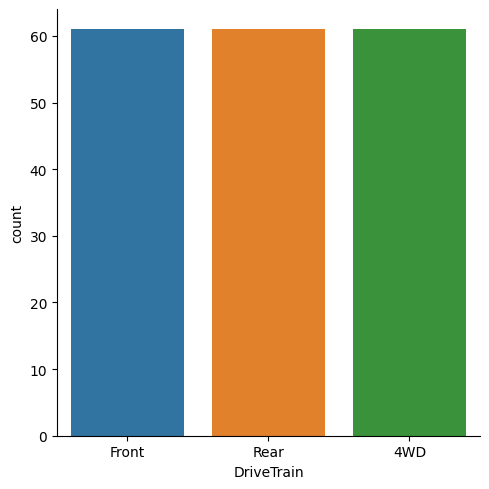

In [ ]:
sns.catplot(data=df_resampled, kind="count", x='DriveTrain')
f.tight_layout()